# Creating The Model

## 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Importing Libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## 3. Check GPU availability

In [3]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 4. Dataset Paths

In [4]:
data_dir = "/content/drive/My Drive/My_Plant_Proj/Dataset/Dataset"
train_dir = f"{data_dir}/train"
valid_dir = f"{data_dir}/valid"

## 5. Image and training parameters

In [ ]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 64
EPOCHS = 10
MAX_PER_CLASS = 180

## 6. Function to Collect Limited Images Per Class

In [6]:
def get_limited_image_paths(directory, max_per_class=180):
    """ Collects at most `max_per_class` images per class. """
    image_paths = []
    labels = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            all_images = os.listdir(class_path)
            selected_images = all_images[:max_per_class]  # Select first 180 images
            for img in selected_images:
                image_paths.append(os.path.join(class_path, img))
                labels.append(class_name)
    return pd.DataFrame({"filename": image_paths, "class": labels})

# Create DataFrame for training & validation
train_df = get_limited_image_paths(train_dir, MAX_PER_CLASS)
valid_df = get_limited_image_paths(valid_dir, MAX_PER_CLASS)

## 7. Data Generators (Using DataFrame)

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, directory=None, x_col="filename", y_col="class",
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df, directory=None, x_col="filename", y_col="class",
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True
)

# ✅ FIXED: Get number of classes
num_classes = len(train_generator.class_indices)

Found 3600 validated image filenames belonging to 20 classes.
Found 3600 validated image filenames belonging to 20 classes.


## 8. Define Model (MobileNetV2 with 128x128 Input)

In [8]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=valid_generator, verbose=1)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2538s 45s/step - accuracy: 0.4007 - loss: 2.1248 - val_accuracy: 0.8425 - val_loss: 0.5929
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 445ms/step - accuracy: 0.9007 - loss: 0.4337 - val_accuracy: 0.9017 - val_loss: 0.3783
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 441ms/step - accuracy: 0.9438 - loss: 0.2562 - val_accuracy: 0.9100 - val_loss: 0.3179
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 442ms/step - accuracy: 0.9624 - loss: 0.1840 - val_accuracy: 0.9217 - val_loss: 0.2742
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 450ms/step - accuracy: 0.9778 - loss: 0.1382 - val_accuracy: 0.9264 - val_loss: 0.2510
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 441ms/step - accuracy: 0.9859 - loss: 0.1108 - val_accuracy: 0.9319 - val_loss: 0.2281
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 588ms/step - accuracy: 0.9917 - loss: 0.0855 - val_accuracy: 0.9317 - val_loss: 0.2119
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 438ms/step - accuracy: 0.9961 - loss: 0.0702 - val_accu

## 9. Save Model

In [9]:
# model.save("/content/drive/My Drive/My_Plant_Proj/Dataset/mobilenetv2_fast.h5")

# Graphical visualisations and results

## 1. Setting Styles

In [10]:
plt.style.use("ggplot")

# Color palette
colors = ["#ff6361", "#bc5090", "#ffa600", "#58508d", "#003f5c", "#44bd32"]

plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

## 2. Accuracy Plot

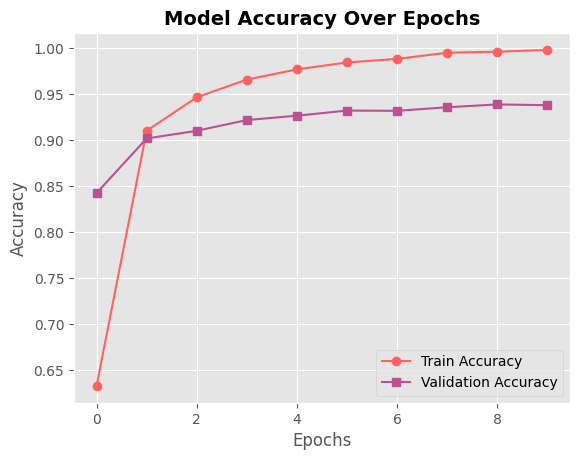

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o', color=colors[0])
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s', color=colors[1])
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

## 3. Loss Plot

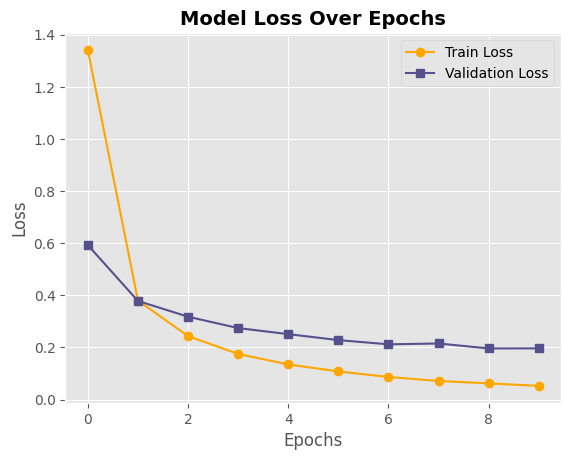

In [16]:
plt.plot(history.history['loss'], label='Train Loss', marker='o', color=colors[2])
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s', color=colors[3])
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

## 4. Train vs. Validation Loss Difference


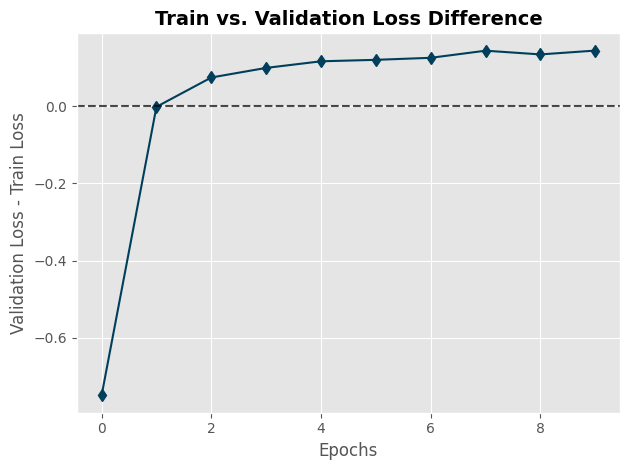

In [17]:
loss_diff = np.array(history.history['val_loss']) - np.array(history.history['loss'])
plt.plot(loss_diff, marker='d', color=colors[4])
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.title('Train vs. Validation Loss Difference', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss - Train Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

## 5. Class Distribution of training data

<ipython-input-14-f0633d94371b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


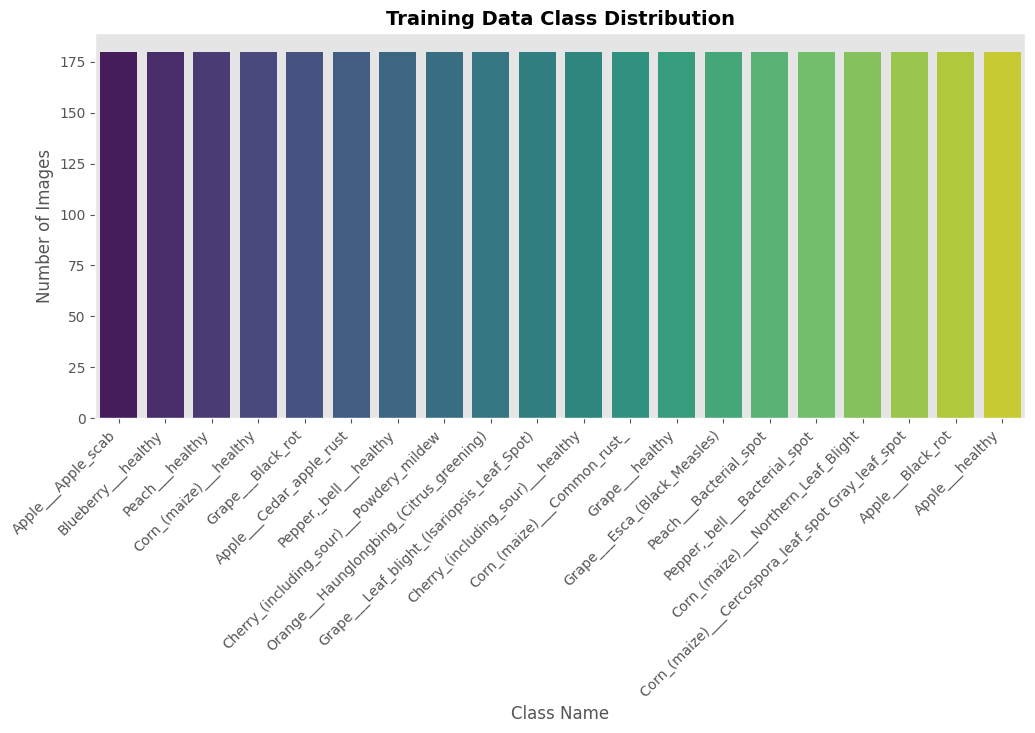

In [14]:
plt.figure(figsize=(12, 5))
class_counts = train_df['class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Training Data Class Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()